### 03 Quantification

In [161]:
import sys
sys.path.append("../")
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

In [126]:
from analyser.mask_feature import MaskFeature
from painter.painter import plot_cells

#### load mask

In [127]:
mask = imread("../../data_test/mask_YAV2104xYAV2105_005_13_R3D.tif").astype(np.int16)[0]

#### Calculate eigenvalues

In [128]:
mf = MaskFeature(mask)
cost = mf.all_by_all_distance()

#### morphology features

In [116]:
mf.instance_properties

,label,centroid_0,centroid_1,orientation,axis_major_length,axis_minor_length,area,bbox_0,bbox_1,bbox_2,bbox_3,eccentricity,coords,semantic,instance,is_out_of_border,arg
label,,,,,,,,,,,,,,,,,
1001,1001,21.507478,411.463609,-0.269096,37.821426,34.490367,1003,4,395,40,427,0.410353,"[[37.5, 37.5, 38.5, 37.868421052631575, 39.5, ...",1,1,True,0
1002,1002,48.074368,201.380764,-1.206793,72.713252,35.696803,2017,26,168,72,236,0.871201,"[[71.5, 68.47368421052632, 61.89473684210526, ...",1,2,False,1
1004,1004,76.246753,219.102659,-1.143388,64.257760,32.336879,1617,55,191,99,249,0.864148,"[[98.5, 94.60526315789474, 88.42105263157895, ...",1,4,False,2
1005,1005,74.339943,352.368272,0.538401,38.662474,34.980591,1059,57,335,94,371,0.425904,"[[93.5, 93.13157894736842, 90.76315789473685, ...",1,5,False,3
1006,1006,77.308378,387.308378,-0.532099,41.595758,34.510239,1122,57,370,98,408,0.558272,"[[97.5, 96.76315789473685, 94.02631578947368, ...",1,6,False,4
1007,1007,86.411555,261.351641,-0.987409,52.057589,34.664741,1402,66,237,110,286,0.746048,"[[109.5, 105.57894736842105, 100.1578947368421...",1,7,False,5
1008,1008,112.160412,219.248712,-1.175802,49.720045,35.052098,1359,93,196,132,244,0.709218,"[[131.5, 130.89473684210526, 127.2894736842105...",1,8,False,6
1009,1009,128.561619,264.825261,-0.429936,57.775805,36.154981,1631,102,245,157,286,0.779999,"[[156.5, 154.5, 150.8421052631579, 144.7631578...",1,9,False,7
1010,1010,127.047722,134.693420,-0.654901,49.629739,35.544430,1383,105,114,151,156,0.697903,"[[150.5, 148.3421052631579, 143.68421052631578...",1,10,False,8


In [ ]:
mf.instance_properties.to_csv("<your output file path>")

#### distance heatmap

In [117]:
data = mf.cost2matrix()

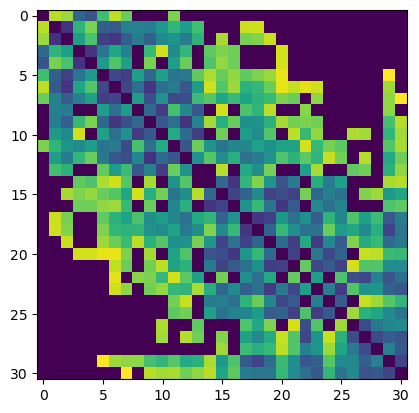

In [118]:
plt.imshow(data[:,:,0])

In [160]:
## nearest cells

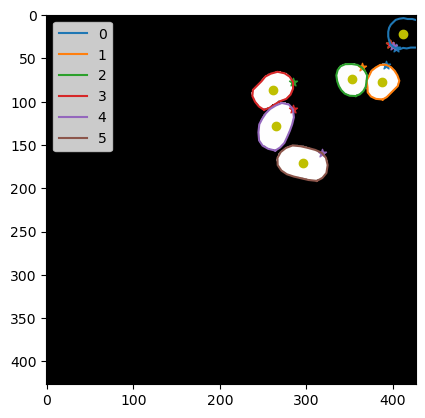

In [159]:
x_label = 1001
y_label, t_x, t_y = mf.nearnestN(x_label, n=5)
labels = [x_label]+list(y_label)
ct = mf.get_centers(labels).values
ot = np.array(mf.cal_coordinates(labels))
tip = np.array([[ot[0][:,t_x[i]], ot[i+1][:,t_y[i]]] for i in range(0, len(y_label))])
plot_cells(mf.get_cells(mf.get_cells(y_label)), ct, ot, tip)